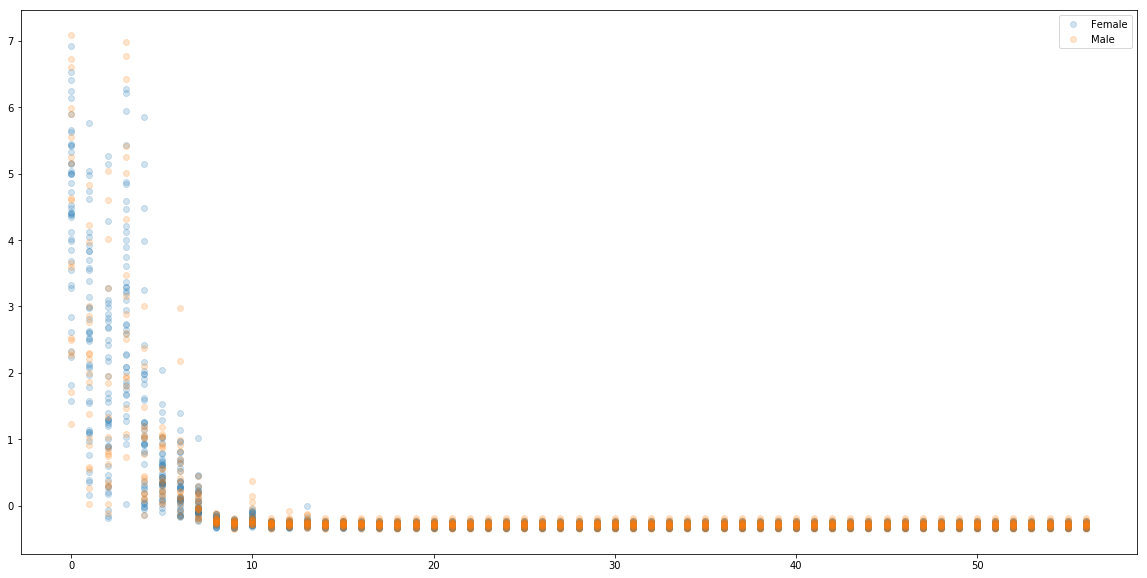

['cBacilli', 'cBacteroidia', 'cBetaproteobacteria', 'cClostridia', 'cGammaproteobacteria', 'cActinobacteria', 'cFusobacteria', 'cFlavobacteriia', 'cSphingobacteriia', 'cDeltaproteobacteria', 'cEpsilonproteobacteria', 'cAlphaproteobacteria', 'cSpirochaetes', 'cErysipelotrichi', 'cThermotogae', 'cNostocophycideae', 'cMollicutes', 'cChlamydiia', 'cSynergistia', 'cDeinococci', 'cAnaerolineae', 'cThermoprotei', 'cOscillatoriophycideae', 'cThermodesulfobacteria', 'cDeferribacteres', 'cGroup II', 'cOpitutae', 'cCaldithrixae', 'cNitriliruptoria', 'cThermobacula', 'cFibrobacteria', 'cAcidimicrobiia', 'cSynechococcophycideae', 'cNitrospira', 'cHolophagae', 'cKtedonobacteria', 'cBrocadiae', 'cAcidobacteria', 'cChrysiogenetes', 'cDehalococcoidetes', 'cVerrucomicrobiae', 'cLeptospirae', 'cMethanomicrobia', 'cMethanobacteria', 'cChlorobia', 'cChloroflexi', 'cThermoleophilia', 'cHalobacteria', 'cMethylacidiphilae', 'cArchaeoglobi', 'cPedosphaerae', 'cPlanctomycetia', 'cSolibacteres', 'cArmatimonadia'

In [9]:
#Create a scatter plot comparing male vs female for the bacteria classes
#uses csv with normalized data
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data straight from CSV
rawdata = []
bClass = []

#get raw data from csv 
with open("ClassGenderNormalized.csv") as csvfile:
    reader = csv.reader(csvfile) 
    bClass = next(reader)
    for row in reader:
        rawdata.append(row)

bClass.remove('Male')
bClass.remove('Female')

#convert strings to floats
rawdata = [[float(y) for y in x] for x in rawdata]

#contains class index
x_axis = []
#contains actual data
y_axis = []
#contains gender label
labels = []

#go through raw data and add the data onto respective lists
for i in range(0, len(bClass)):
    for row in rawdata:
        if row[0] == 1.0:
            labels.append('Male')
        else:
            labels.append('Female')
        x_axis.append(i)
        y_axis.append(row[2+i])

#putting everything together
df = pd.DataFrame(dict(x=x_axis, y=y_axis, label=labels))
groups = df.groupby('label')

#Plotting 
fig, ax = plt.subplots(figsize=(20, 10))
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name, alpha=0.2)
ax.legend()

plt.show()    

#print list of classes
print(bClass)

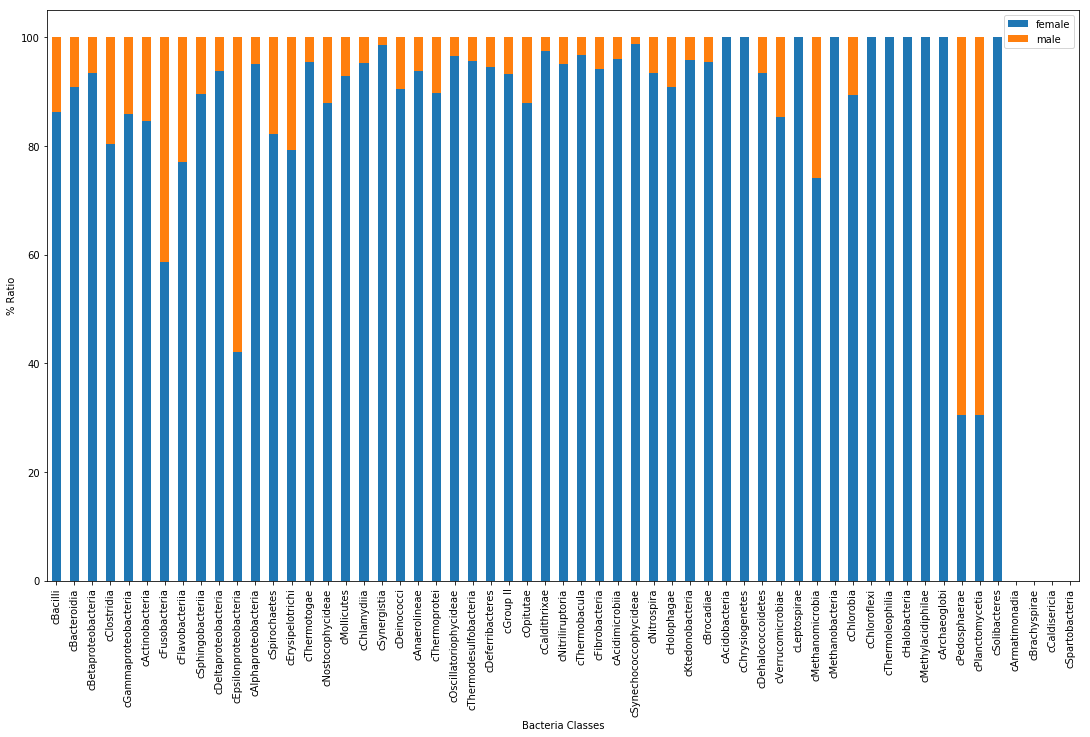

In [4]:
#Creating a stacked column chart comparing the ratio of male:female for each class of bacteria
#uses csv with original data

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_axis = (
    'cBacilli', 'cBacteroidia', 'cBetaproteobacteria', 'cClostridia', 'cGammaproteobacteria', 
    'cActinobacteria', 'cFusobacteria', 'cFlavobacteriia', 'cSphingobacteriia', 'cDeltaproteobacteria', 
    'cEpsilonproteobacteria', 'cAlphaproteobacteria', 'cSpirochaetes', 'cErysipelotrichi', 'cThermotogae', 
    'cNostocophycideae', 'cMollicutes', 'cChlamydiia', 'cSynergistia', 'cDeinococci', 'cAnaerolineae', 
    'cThermoprotei', 'cOscillatoriophycideae', 'cThermodesulfobacteria', 'cDeferribacteres', 'cGroup II', 
    'cOpitutae', 'cCaldithrixae', 'cNitriliruptoria', 'cThermobacula', 'cFibrobacteria', 'cAcidimicrobiia', 
    'cSynechococcophycideae', 'cNitrospira', 'cHolophagae', 'cKtedonobacteria', 'cBrocadiae', 'cAcidobacteria', 
    'cChrysiogenetes', 'cDehalococcoidetes', 'cVerrucomicrobiae', 'cLeptospirae', 'cMethanomicrobia', 
    'cMethanobacteria', 'cChlorobia', 'cChloroflexi', 'cThermoleophilia', 'cHalobacteria', 'cMethylacidiphilae', 
    'cArchaeoglobi', 'cPedosphaerae', 'cPlanctomycetia', 'cSolibacteres', 'cArmatimonadia', 'cBrachyspirae', 
    'cCaldisericia', 'cSpartobacteria'
)

index = pd.Index(x_axis, name='Bacteria Classes')

#data straight from CSV
rawdata = []
bClass = []

#get raw data from csv 
with open("ClassGenderOriginal.csv") as csvfile:
    reader = csv.reader(csvfile) 
    bClass = next(reader)
    for row in reader:
        rawdata.append(row)

bClass.remove('Male')
bClass.remove('Female')

#convert strings to floats
rawdata = [[float(y) for y in x] for x in rawdata]

#pre-initialze these arrays so that the size = # of classes

#sum of each bacteria class found in males
male_sum = [0 for x in range(len(bClass))]
#sum of each bacteria class found in females
female_sum = [0 for x in range(len(bClass))]

female_count = 0
male_count = 0

identifier = ''

#go through raw data and sum the data onto respective lists
for row in rawdata:
    if row[0] == 1.0:
        selected_list = male_sum
        identifier = 'm'
        male_count += 1
    else:
        selected_list = female_sum
        identifier = 'f'
        female_count += 1
    for i in range(2, len(row)):
        selected_list[i-2] += row[i]
    if identifier is 'm':
        male_sum = selected_list
    if identifier is 'f':
        female_sum = selected_list

#increase the male data so the data isn't skewed due to uneven sampling
for i in range(0, len(male_sum)):
    if male_sum[i] != 0:
        male_sum[i] = male_sum[i] * (female_count/male_count)

total_sum = [x + y for x, y in zip(female_sum, male_sum)]

for i in range(0, len(total_sum)):
    if total_sum[i] != 0:
        female_sum[i] = female_sum[i] / total_sum[i] * 100
        male_sum[i] = male_sum[i] / total_sum[i] * 100

data = {
    'female': female_sum,
    'male': male_sum
}

df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
ax.set_ylabel('% Ratio')
plt.show()